<a href="https://colab.research.google.com/github/ashishkumar1232/Machine_learning_projects/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the dataset
loan_data= pd.read_csv('/content/loan_dataset.csv')

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data=loan_data.dropna()

In [ ]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# Label Encoding
loan_data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
loan_data.replace({'Married':{'Yes':1,'No':0}},inplace=True)
loan_data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
loan_data.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)

<ipython-input-18-513949ccaa39>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [ ]:
loan_data['Property_Area'].value_counts()

,count
Property_Area,
0,191
1,150
2,139


In [ ]:
loan_data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [ ]:
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
loan_data=loan_data.replace(to_replace='3+',value=4)

<Axes: xlabel='Education', ylabel='count'>

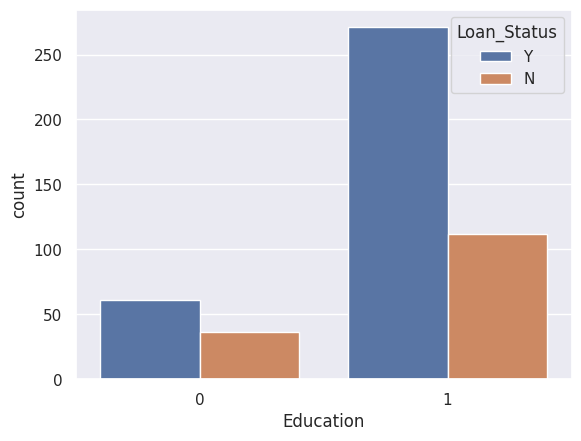

In [ ]:
# visualizing the data from seaborn libraries
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

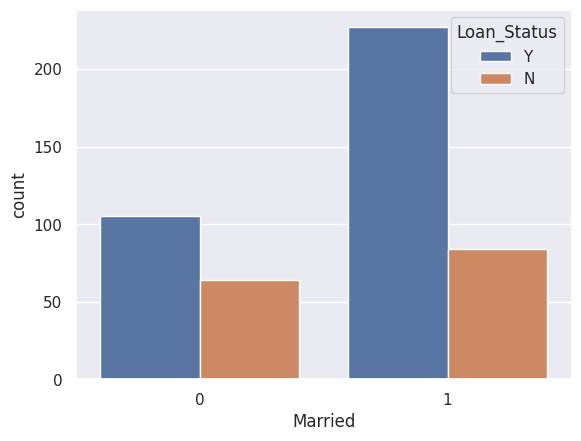

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Self_Employed', ylabel='count'>

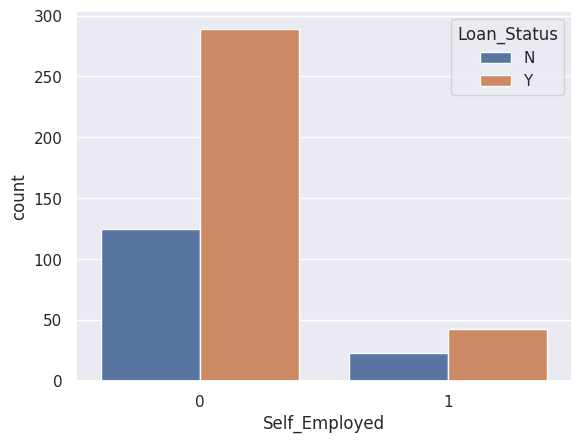

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Property_Area', ylabel='count'>

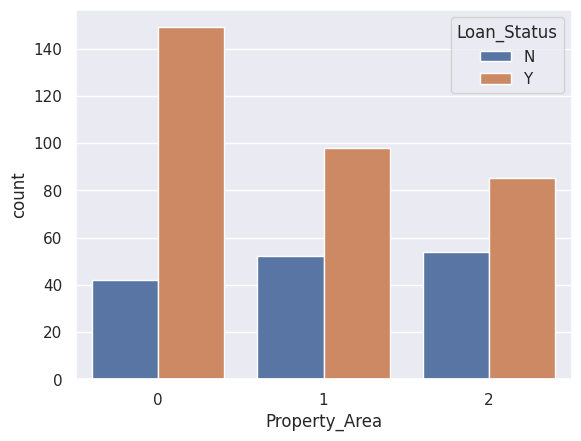

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Dependents', ylabel='count'>

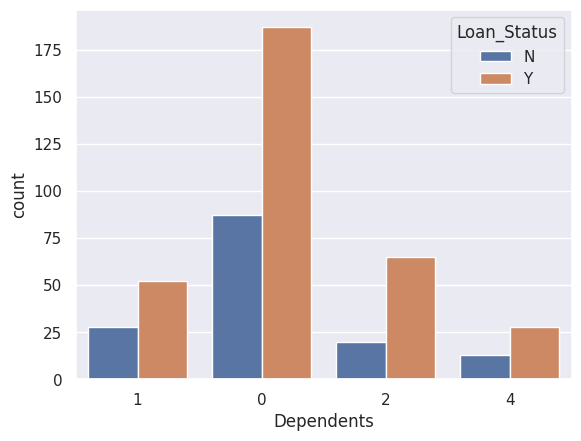

In [ ]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data)

In [ ]:
loan_data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

<ipython-input-29-9463a1f15e10>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
x=loan_data.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y=loan_data['Loan_Status']

In [ ]:
print(x,y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
# Splitting the data int train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
# training the model
model =svm.SVC(kernel='linear')

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
# accuracy on the training data
x_train_pred=model.predict(x_train)
x_train_acc=accuracy_score(x_train_pred,y_train)
print('Accuracy on training data :',x_train_acc)

Accuracy on training data : 0.7615740740740741


In [ ]:
# accuracy score on the test data
x_test_pred=model.predict(x_test)
x_test_acc=accuracy_score(x_test_pred,y_test)
print('Accuracy on test data :',x_test_acc)

Accuracy on test data : 0.75


In [ ]:
# Making a predictive model
input=(1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1)
input_array=np.asarray(input)
input_reshaped=input_array.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[1]
The loan is approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
